# Conclusion for my analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../input/top-50-bestselling-novels-20092021-of-amazon/Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [2]:
# Data Cleaning
df.columns = df.columns.str.replace(" ","_")
df.Genre = df.Genre.replace('\s+', '_', regex=True)
df.Reviews = df.Reviews.replace(',', '', regex=True)
df['Price'] = df['Price'].str.strip('$')
df['Price_r'] = df['Price_r'].str.strip('$')
df['Reviews'] = df['Reviews'].astype('int')
df['Price'] = df['Price'].astype('float')
df['Price_r'] = df['Price_r'].astype('int')

df.User_Rating.head()

0    4.7
1    4.6
2    4.7
3    4.7
4    4.7
Name: User_Rating, dtype: float64

In [3]:
pd.set_option("display.max_columns",20)
pd.set_option("display.max_rows",20000)

res = df.sort_values("Reviews").value_counts("Reviews").head(20)
res1 = df[df["Reviews"]==21834]
df[df["Author"]=="American Psychological Association"]
df.sort_values("Reviews", ascending=False).head()
df.User_Rating.head()

0    4.7
1    4.6
2    4.7
3    4.7
4    4.7
Name: User_Rating, dtype: float64

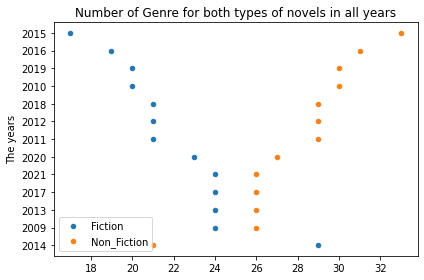

In [4]:
fig, ax= plt.subplots()
df1 = pd.DataFrame()
i=2009
while i <=2021:
    df1[str(i)] = df[df["Year"]==i].Genre.value_counts()
    i+=1
df1 = df1.T.sort_values("Non_Fiction",ascending=True)

fiction = ax.scatter( df1.Fiction,df1.index,20, label="Fiction")
non_fiction = ax.scatter( df1.Non_Fiction,df1.index,20, label="Non_Fiction")
ax.set_ylabel('The years')
ax.set_title('Number of Genre for both types of novels in all years')
fig.tight_layout()
ax.legend()
plt.show()


In [5]:
df[df["Reviews"]>=20000].sort_values("Reviews", ascending = False).head()


,Name,Author,User_Rating,Reviews,Price,Price_r,Year,Genre
513,The Midnight Library: A Novel,Matt Haig,4.3,193482,13.29,14,2021,Fiction
226,It Ends with Us: A Novel (1),Colleen Hoover,4.7,141748,10.26,11,2021,Fiction
633,Where the Crawdads Sing,Delia Owens,4.8,120727,9.00,9,2020,Fiction
455,The Four Winds: A Novel,Kristin Hannah,4.5,117146,13.79,14,2021,Fiction
539,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,4.6,111053,9.42,10,2021,Fiction


In [6]:
soy = []
soy1 = []
for i in df.User_Rating:
    soy.append(i)
for i in soy:
    soy1.append(i/5)
soy1
df["User_Rating"]=soy1
df.head()

,Name,Author,User_Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,0.94,17350,8.00,8,2016,Non_Fiction
1,11/22/63: A Novel,Stephen King,0.92,2052,22.00,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,0.94,18979,15.00,15,2018,Non_Fiction
3,1984,George Orwell,0.94,70425,7.48,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,0.94,21424,6.00,6,2017,Fiction
